# i) Importing all required library function which helps to create model 


In [5]:
import keras, os 
from tensorflow.keras import Sequential  # This gets our NN as Sequential network  
from keras.layers import Conv2D   # apply filters to images we need convolution layer
from keras.layers import MaxPool2D  # it reduces the input size to half (helps in generalization, decreasing parameters and avoid overfitting) 
from keras.layers import Flatten  # to convert the filter 2D output into 1D which require as input to fully connected layers at the end 
from keras.layers import Dense  # the fully connected layers are implemented by using this layer 

from keras.preprocessing.image import ImageDataGenerator  # it helps to apply augmentation (rescale, rotate, zoom, flip etc.)  which is desirable when training data is small 
import numpy as np  # convert the image data into a form which makes it easy and fast to perform computations


# ii) Data Preparation and Initializing the AlexNet:

In [15]:
trdata = ImageDataGenerator()   # initialize for training data preparation 
traindata = trdata.flow_from_directory(directory= '/content/cats_and_dogs_small/train',batch_size=20, target_size = (224, 224))  # target size is according to the input size of AlexNet  Model
tsdata = ImageDataGenerator()   # initialize for test data preparation 
testdata = tsdata.flow_from_directory(directory= '/content/cats_and_dogs_small/test', batch_size=20,target_size = (224, 224))  # target size is according to the input size of AlexNet Model
VGG = keras.applications.VGG16(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet') # take the imagenet weights to fine-tune later layers (recommended when we have small training data) , include top False exclude the last three fully connected layers 
VGG.trainable = False  # we only train the last three fully connected layers because we are taking the imagenet weight which already captured generic features 

model= keras.Sequential([ VGG, 
					      keras.layers.Flatten(), 
					      keras.layers.Dense(units=256, activation='relu'),
				   	    keras.layers.Dense(units=256, activation='relu'),
					      keras.layers.Dense(units=2, activation='softmax')])   
            # add three fully connected layers of size 256, 256 and 2 (depends upon the number of output classes) respectively 


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
58892288/58889256 [==============================] - 0s 0us/step


# iii) Training:

In [16]:
model.compile(optimizer='adam', loss= keras.losses.categorical_crossentropy, metrics =['accuracy']) # optimizer helps to update weight on the basis of loss computed 

model.summary()  # shows the complete AlexNet model
hist = model.fit_generator(steps_per_epoch = 100, generator =traindata, validation_data= testdata, validation_steps = 50, epochs = 10)  # steps_per_epoch is computed by total images/epoch, 
# you can visualize the test performance by using the values stored in hist like, hist.history[“accuracy”] etc 

model.save('vgg_model.h5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               6422784   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 514       
Total params: 21,203,778
Trainable params: 6,489,090
Non-trainable params: 14,714,688
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
100/100 [==============================] - 51s 147ms/step - loss: 9.1422 - accuracy: 0.8238 - val_loss: 1.1057 - val_accuracy: 0.9550
Epoch 2/10
100/100 [==============================] - 15s 146ms/step - loss: 0.4677 - accuracy: 0.9757 - val_loss: 0.6945 - val_accuracy: 0.9580
Epoch 3/10
100/100 [==============================] - 15s 148ms/step - loss: 0.1757 - accuracy: 0.9855 - val_loss: 0.7100 - val_accuracy: 0.9570
Epoch 4/10
100/100 [==============================] - 15s 150ms/step - loss: 0.0899 - accuracy: 0.9924 - val_loss: 0.8489 - val_accuracy: 0.9560
Epoch 5/10
100/100 [==============================] - 15s 153ms/step - loss: 0.0597 - accuracy: 0.9976 - val_loss: 0.9889 - val_accuracy: 0.9570
Epoch 6/10
100/100 [==============================] - 15s 154ms/step - loss: 0.0336 - accuracy: 0.9952 - val_loss: 1.3010 - val_accuracy: 0.9580
Epoch 7/10
100/100 [==============================] - 16s 156ms/step - loss: 0.1066 - accuracy: 0.9928 - val_loss: 1.5022 - val_ac

In [4]:
#!unzip /content/cats_and_dogs_small.zip

# iv) Plotting the Training Progress:

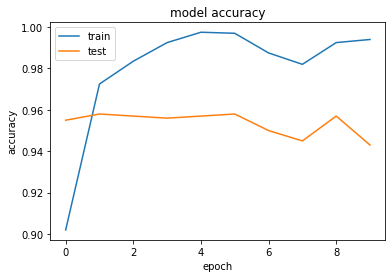

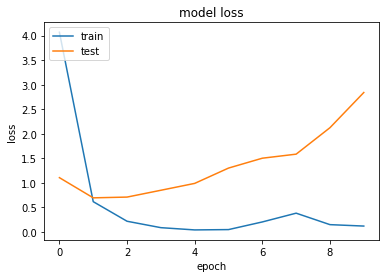

In [17]:

import matplotlib.pyplot as plt   # helps to plot the training progress 
plt.plot(hist.history['accuracy'])   # summarize history for accuracy
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])  # summarize history for loss
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



# iv) Testing Model

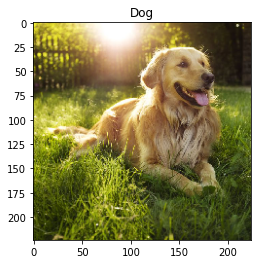

In [20]:
 
from keras.preprocessing import image  # to load test image 
img = image.load_img('/content/img.jpg', target_size=(224, 224))
img_o = np.asarray(img)

img = np.expand_dims(img_o, axis=0)  # because the input to Alexnet have three channels
from keras.models import load_model
saved_model = load_model('vgg_model.h5')
output = saved_model.predict(img) 
if (np.argmax(output)==0):
  plt.title('Cat')
  
elif (np.argmax(output)==1):
   plt.title('Dog')
   
plt.imshow(img_o)